<a href="https://colab.research.google.com/github/isaacmsl/mnist-classifiers-california-housing-regressors/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import tree, metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8566457898399443
[[32  0  0  1  1  1  1  0  0  0]
 [ 0 29  0  1  0  3  1  1  0  1]
 [ 0  0 31  0  0  1  1  0  1  1]
 [ 0  1  1 30  0  0  0  0  2  3]
 [ 0  0  0  1 34  0  1  0  0  0]
 [ 0  1  0  0  1 34  0  0  0  1]
 [ 0  1  0  1  0  0 33  0  1  0]
 [ 0  4  0  0  2  0  0 29  0  1]
 [ 0  1  0  0  1  3  1  1 26  2]
 [ 0  0  0  3  2  2  0  1  1 27]]
Accuracy: 0.8472222222222222


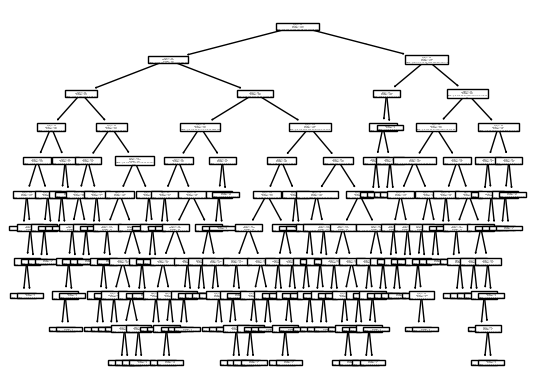

In [ ]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_


tree.plot_tree(best_model)


y_pred = best_model.predict(X_test)


print(metrics.confusion_matrix(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
